In [4]:
import pandas as pd

# Load your dataset
df = pd.read_csv("data\marketing_campaign_dataset.csv")

# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Clean 'Acquisition_Cost' column
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Convert other numeric fields to float
numeric_cols = ['Conversion_Rate', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
df[numeric_cols] = df[numeric_cols].astype(float)

# Check for null values
print("Null Values:\n", df.isnull().sum())

# Preview cleaned data
print("\nCleaned Data Preview:\n", df.head())
print("\nColumn Data Types:\n", df.dtypes)


Null Values:
 Campaign_ID         0
Company             0
Campaign_Type       0
Target_Audience     0
Duration            0
Channel_Used        0
Conversion_Rate     0
Acquisition_Cost    0
ROI                 0
Location            0
Language            0
Clicks              0
Impressions         0
Engagement_Score    0
Customer_Segment    0
Date                0
dtype: int64

Cleaned Data Preview:
    Campaign_ID              Company Campaign_Type Target_Audience Duration  \
0            1  Innovate Industries         Email       Men 18-24  30 days   
1            2       NexGen Systems         Email     Women 35-44  60 days   
2            3    Alpha Innovations    Influencer       Men 25-34  30 days   
3            4   DataTech Solutions       Display        All Ages  60 days   
4            5       NexGen Systems         Email       Men 25-34  15 days   

  Channel_Used  Conversion_Rate  Acquisition_Cost   ROI     Location  \
0   Google Ads             0.04           16174.0  6.29 


Average Conversion Rate by Channel:
 Channel_Used
Email         0.080282
Google Ads    0.080183
Website       0.080183
Facebook      0.079992
YouTube       0.079889
Instagram     0.079886
Name: Conversion_Rate, dtype: float64

Average ROI by Campaign Type:
 Campaign_Type
Influencer      5.011068
Search          5.008357
Display         5.006551
Email           4.994295
Social Media    4.991784
Name: ROI, dtype: float64

Top Customer Segments by Avg Engagement Score:
 Customer_Segment
Foodies                5.511465
Outdoor Adventurers    5.502737
Fashionistas           5.489910
Tech Enthusiasts       5.485168
Health & Wellness      5.484156
Name: Engagement_Score, dtype: float64


C:\Users\Jui\AppData\Local\Temp\ipykernel_23228\2619108030.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=channel_conv.index, y=channel_conv.values, palette="viridis")


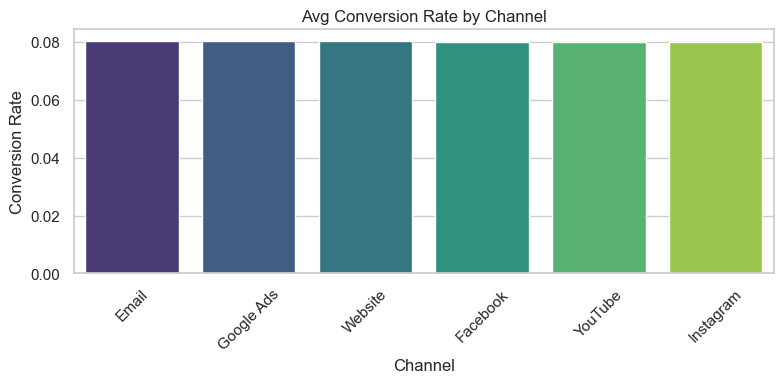

C:\Users\Jui\AppData\Local\Temp\ipykernel_23228\2619108030.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=roi_by_campaign.index, y=roi_by_campaign.values, palette="coolwarm")


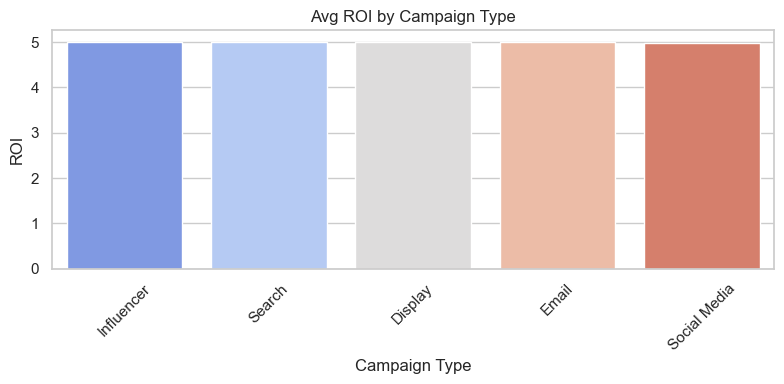

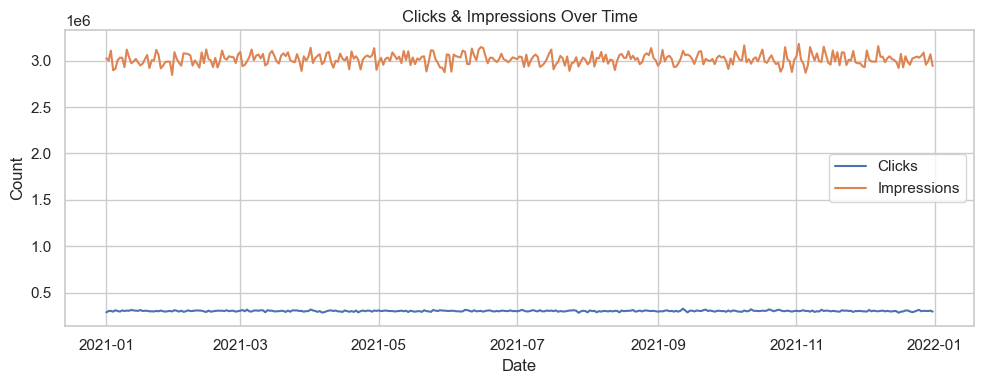

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set(style="whitegrid")

# 1. Conversion Rate by Channel
channel_conv = df.groupby("Channel_Used")["Conversion_Rate"].mean().sort_values(ascending=False)
print("\nAverage Conversion Rate by Channel:\n", channel_conv)

# 2. ROI by Campaign Type
roi_by_campaign = df.groupby("Campaign_Type")["ROI"].mean().sort_values(ascending=False)
print("\nAverage ROI by Campaign Type:\n", roi_by_campaign)

# 3. Clicks & Impressions Over Time
df_time = df.groupby("Date")[["Clicks", "Impressions"]].sum().reset_index()

# 4. Top Customer Segments by Engagement
segment_engage = df.groupby("Customer_Segment")["Engagement_Score"].mean().sort_values(ascending=False)
print("\nTop Customer Segments by Avg Engagement Score:\n", segment_engage)

# 5. Plot: Conversion Rate by Channel
plt.figure(figsize=(8,4))
sns.barplot(x=channel_conv.index, y=channel_conv.values, palette="viridis")
plt.title("Avg Conversion Rate by Channel")
plt.ylabel("Conversion Rate")
plt.xlabel("Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 6. Plot: ROI by Campaign Type
plt.figure(figsize=(8,4))
sns.barplot(x=roi_by_campaign.index, y=roi_by_campaign.values, palette="coolwarm")
plt.title("Avg ROI by Campaign Type")
plt.ylabel("ROI")
plt.xlabel("Campaign Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 7. Plot: Clicks over time
plt.figure(figsize=(10,4))
plt.plot(df_time["Date"], df_time["Clicks"], label="Clicks")
plt.plot(df_time["Date"], df_time["Impressions"], label="Impressions")
plt.title("Clicks & Impressions Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()
